In [1]:
from PIL import Image, ImageFont, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import json
from pprint import pprint


In [2]:
index = 250
font = ImageFont.truetype("./OpenSans-Regular.ttf", 12)

In [3]:
# utility functions
def divide_chunks(l, n):
    for i in range(0, len(l), n):  
        yield tuple(l[i:i + n] )
        
def get_visible(point):
    if point[2] == 2:
        return True
    else:
        return False


In [4]:
with open('../data/annotations/person_keypoints_val2017.json') as f:
  data = json.load(f)

categories = data['categories'][0]['keypoints']
pprint(categories)

annotation = data['annotations'][index]
image_id = annotation['image_id']
filename = f'{image_id:012}.jpg' 
print(filename)

keypoints = list(divide_chunks(annotation['keypoints'], 3))
bbox = annotation['bbox']
x1, y1, x2, y2 = bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]

pprint(keypoints)
pprint(bbox)

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']
000000299887.jpg
[(411, 165, 2),
 (422, 153, 2),
 (401, 156, 2),
 (435, 161, 2),
 (388, 164, 2),
 (476, 217, 2),
 (376, 228, 2),
 (504, 288, 2),
 (0, 0, 0),
 (501, 341, 2),
 (0, 0, 0),
 (473, 340, 2),
 (416, 347, 2),
 (476, 457, 2),
 (448, 459, 2),
 (0, 0, 0),
 (0, 0, 0)]
[370.31, 122.12, 148.44, 357.88]


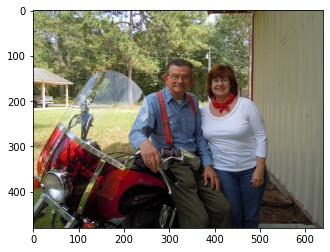

In [5]:
source_img = Image.open('../data/val2017/' + filename)
imshow(np.asarray(source_img))

In [6]:
img_bbox = source_img.copy()
draw = ImageDraw.Draw(img_bbox, 'RGBA')
draw.rectangle(((x1, y1), (x2, y2)), outline=(255, 255, 255, 255), fill=(128,0,128,125))

In [7]:
cropped = source_img.crop((x1, y1, x2, y2))

In [8]:
width, height = cropped.size
width_ratio = 192 / width
height_ratio =256 / height

resized = cropped.resize((192, 256), 1)

In [9]:
img_points = resized.copy()

def get_adjusted_point(point):
    return ((point[0] - x1) * width_ratio, (point[1] - y1) * height_ratio, point[2])

def random_color():
    return tuple(np.random.randint(256, size=3))

def get_circle_point(x, y, r=5):
    return (x - r, y - r, x + r, y + r)

adjusted_points = list(map(get_adjusted_point, keypoints))
draw = ImageDraw.Draw(img_points)

for i, p in enumerate(adjusted_points):
    x, y, v = p

    if v == 2:
        draw.ellipse(get_circle_point(x, y), outline="black", fill=random_color())
        draw.text((x+10, y-10), categories[i], fill ="red", font = font)
        

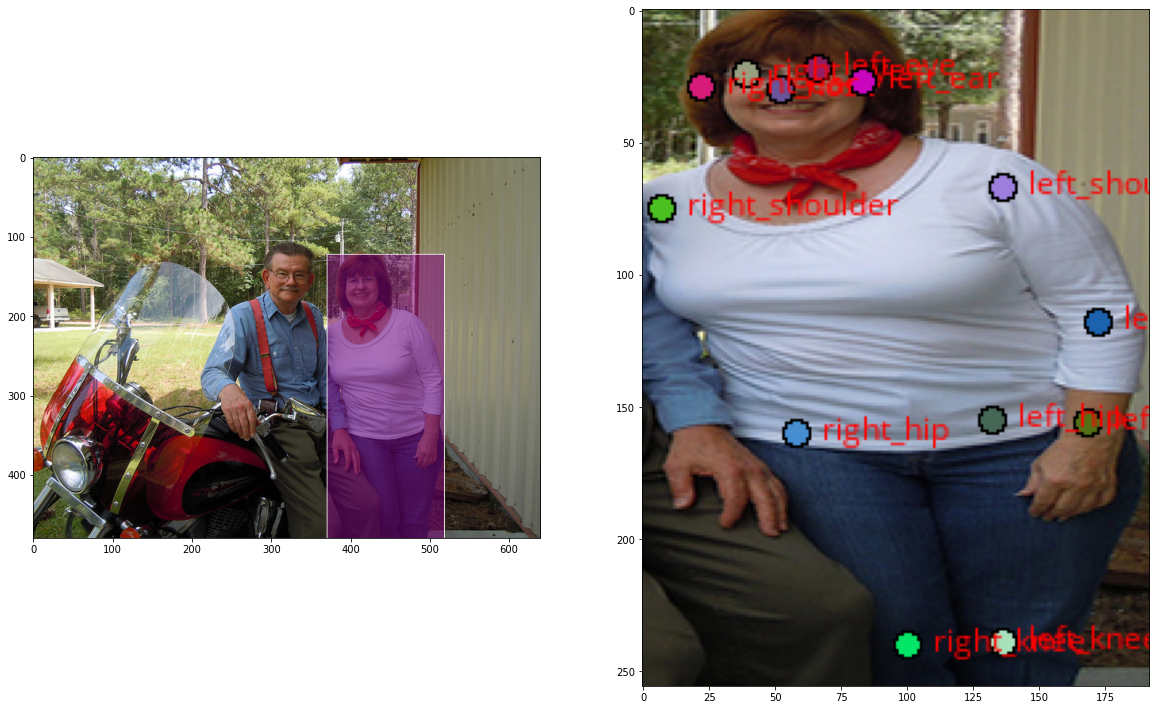

In [10]:
fig = plt.figure(1,figsize=(20,20))

ax1 = fig.add_subplot(121)  # left side
ax1.imshow(img_bbox)

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(img_points)